In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# Model: logistic regression

In [108]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_auc_score, roc_curve,  precision_recall_curve
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

## Data

Load the dataset, applying no major transformations to it.

In [ ]:
data = pd.read_csv('../dataset/creditcard.csv')
data.head()

In [10]:
X = data.drop(columns=['Class'])
y = data['Class']

Since the data is largely unbalanced we must use a stratified sampling to make sure we get both negative and positive samples to train with.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)

## Pipeline (build)

In [49]:
numeric_feature_indexes = slice(0, 30)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_feature_indexes),
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SGDClassifier(loss='log'))
])

In [55]:
num_features_type_map = {feature: 'float64' for feature in X_train.columns[numeric_feature_indexes]}

X_train = X_train.astype(num_features_type_map)
X_test = X_test.astype(num_features_type_map)

In [56]:
pipeline.set_params(classifier__alpha=0.001, classifier__max_iter=200)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  slice(0, 30, None))],
                                   verbose=False)),
                ('classifier',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='log',
                       

## Pipeline (train)

In [63]:
model = pipeline.fit(X_train, y_train)
model 

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  slice(0, 30, None))],
                                   verbose=False)),
                ('classifier',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='log',
                       

## Pipeline (evaluate)

In [65]:
y_pred = model.predict(X_test)

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93825
           1       0.85      0.41      0.55       162

    accuracy                           1.00     93987
   macro avg       0.92      0.70      0.77     93987
weighted avg       1.00      1.00      1.00     93987



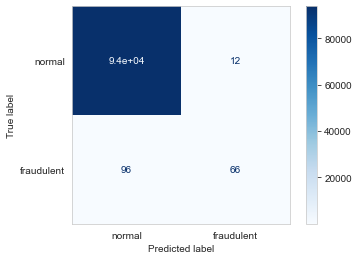

In [92]:
disp = plot_confusion_matrix(model, X_test, y_test, display_labels=['normal', 'fraudulent'], cmap=plt.cm.Blues)
disp.ax_.grid(False)

Some great material is available here: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

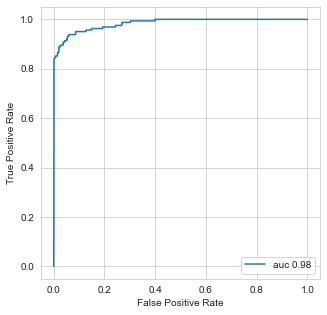

In [106]:
y_pred_proba = pipeline.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(fpr,tpr,label=f"auc {auc:2.2f}")
ax.legend(loc=4)

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate');

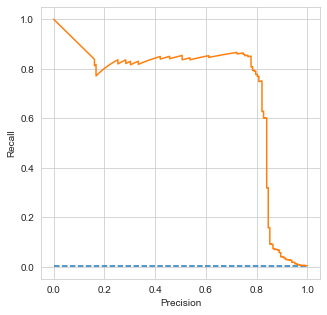

In [109]:
precision, recall, _ = precision_recall_curve(y_test,  y_pred_proba)
fig, ax = plt.subplots(figsize=(5,5))

no_skill = len(y_test[y_test==1]) / len(y_test)
ax.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
ax.plot(recall, precision)

ax.set_xlabel('Precision')
ax.set_ylabel('Recall');